In [14]:
import utils
import librosa
import librosa.display
import os
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import audioread
import numpy as np

from pathlib import Path
# print(librosa.__version__)
os.environ['AUDIO_DIR'] = os.path.join(os.getcwd(), "data", "fma_small")
AUDIO_DIR = os.environ.get('AUDIO_DIR')
print(AUDIO_DIR)
filename = utils.get_audio_path(AUDIO_DIR, 99214)  # AUDIO_DIR + "099\\099135.mp3"  #
print('File: {}'.format(filename))
print(librosa.util.example_audio_file())

D:\tensor\audio_copyright\data\fma_small
File: D:\tensor\audio_copyright\data\fma_small\099\099214.mp3
C:\Users\AIInsight\AppData\Local\librosa\librosa\Cache\Kevin_MacLeod_-_Vibe_Ace.hq.ogg


In [24]:
(x, sr) = librosa.load(filename, sr=None, mono=True)
print(x.shape, sr)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 0, int(x.shape[-1])
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

c:\users\office2\pycharmprojects\skyplaton_\venv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1323119,) 44100
Duration: 30.00s, 1323119 samples


In [32]:
import subprocess as sp
command = ['ffmpeg', '-i', filename,
           '-f', 's16le','-acodec', 'pcm_s16le','-ac', '1']  # channels: 2 for stereo, 1 for mono
command.append('-')
# 30s at 44.1 kHz ~= 1.3e6
proc = sp.run(command, stdout=sp.PIPE, bufsize=10**7, stderr=sp.DEVNULL, check=True)
# print("바꾸는중")
x = np.fromstring(proc.stdout, dtype="int16") / 1.0  # "int16")
print(x.shape)

(1323119,)


c:\users\office2\pycharmprojects\skyplaton_\venv\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


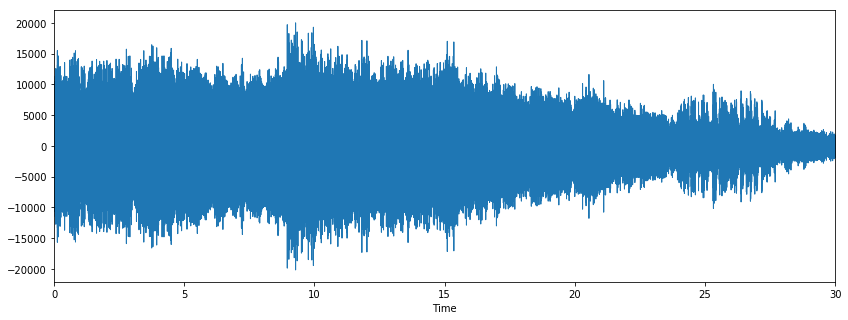

In [33]:
#display waveform
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

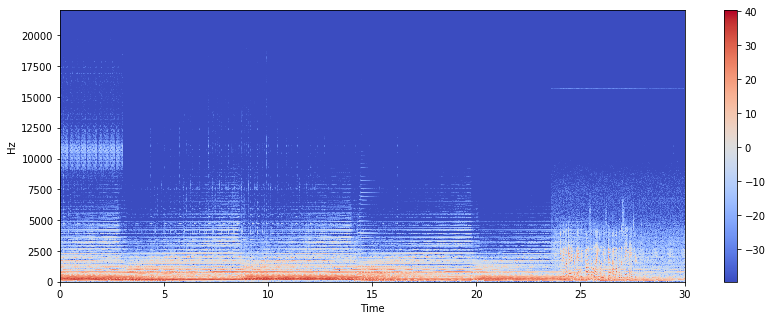

In [9]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#If to pring log of frequencies
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

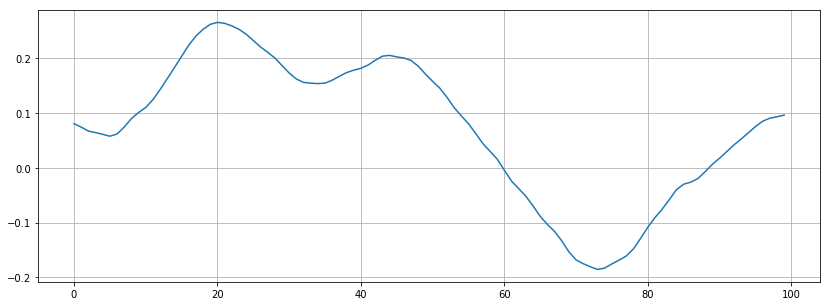

In [11]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

(20, 2585)


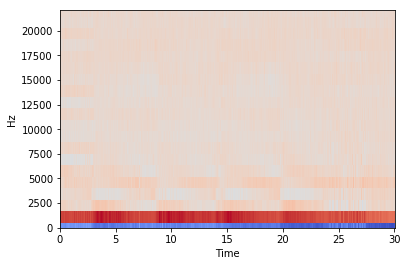

In [26]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='hz')

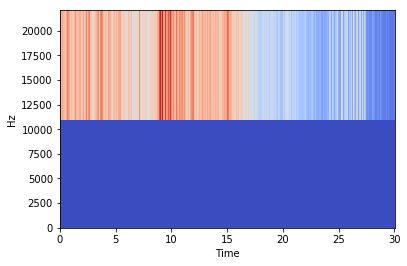

In [27]:
poly_ = librosa.feature.poly_features(x, sr=sr, )
librosa.display.specshow(poly_,sr=sr, x_axis='time', y_axis='hz')

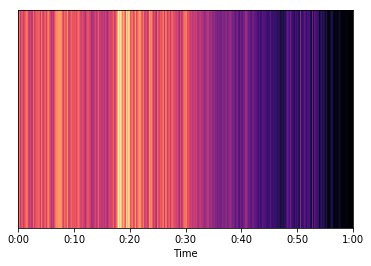

In [29]:
rms = librosa.feature.rms(x,)
librosa.display.specshow(rms, x_axis='time')

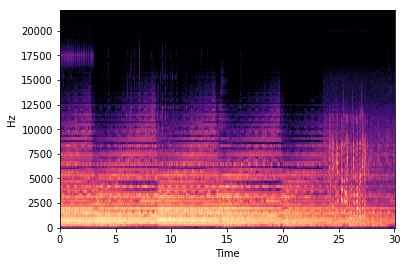

In [35]:
S = librosa.feature.melspectrogram(x /1.0, sr=sr)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S,sr=sr, x_axis='time', y_axis='hz')

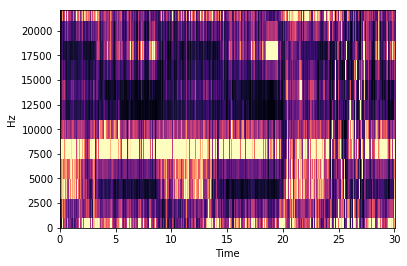

In [18]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
print(chromagram)
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='hz')

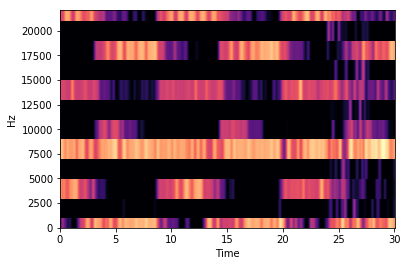

In [19]:
chromagram = librosa.feature.chroma_cens(y=x, sr=sr)
print(chromagram)
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='hz')

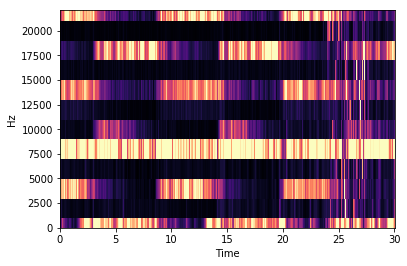

In [20]:
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr)
print(chromagram)
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='hz')

In [22]:
y_harmonic, y_percussive = librosa.effects.hpss(x)
temp, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)
print(temp, beats.shape)

() (55,)
